In [69]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
len(test_images)

10000

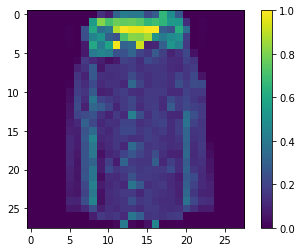

In [62]:
plt.figure()
plt.imshow(train_images[96])
plt.colorbar()
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

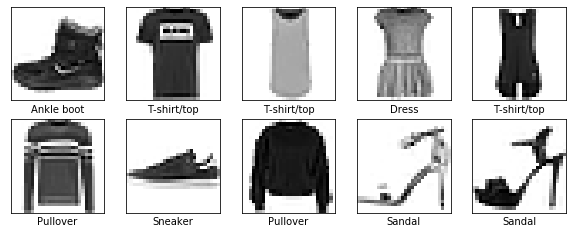

In [31]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.4929 - acc: 0.8262
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3740 - acc: 0.8665
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3360 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3118 - acc: 0.88560s - loss: 0.3116 - acc: 0.885
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2949 - acc: 0.8908
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2800 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2675 - acc: 0.9007
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2565 - acc: 0.90400s - loss: 0.2570 - acc
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2452 - acc: 0.9075
Epoch

In [55]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3384 - acc: 0.8819

Test accuracy: 0.8819


In [56]:
predictions = model.predict(test_images)


In [61]:
np.argmax(predictions[96])

0

In [63]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

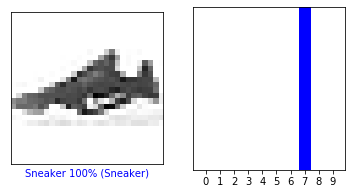

In [67]:
i = 999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [77]:
d = {"Labels":[], "Predictoions":[]}
df = pd.DataFrame(data =d, dtype=np.float64)
#for i in range(6000):
    